<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/CIFAR10_and_CIFAR100_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

## load dataset

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

### reshape my y_test/train into 1D

In [8]:
y_train=y_train.reshape(-1,)

In [9]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [10]:
y_test=y_test.reshape(-1,)

In [11]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### to display the sample data from dataset

In [12]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

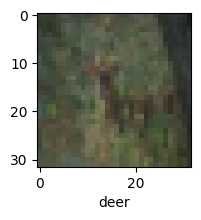

In [13]:
plot_sample(x_train,y_train,10)

## normalized your image

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

### build simple ANN for image classification

In [15]:
ann = models.Sequential([
    layers.Flatten (input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')

])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train,y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 88ms/step - accuracy: 0.2998 - loss: 1.9321
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4167 - loss: 1.6501
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.4550 - loss: 1.5536
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 93ms/step - accuracy: 0.4722 - loss: 1.4952
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 90ms/step - accuracy: 0.4919 - loss: 1.4417


### getting very low accuracy in image classfication using ANN


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred =  ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report:\n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
classification report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.64      0.56      0.60      1000
           2       0.36      0.38      0.37      1000
           3       0.38      0.25      0.30      1000
           4       0.59      0.15      0.24      1000
           5       0.44      0.35      0.39      1000
           6       0.35      0.81      0.49      1000
           7       0.59      0.49      0.54      1000
           8       0.66      0.56      0.61      1000
           9       0.49      0.65      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



### Trying with CNN

In [17]:
from keras import Sequential
cnn = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

cnn.compile(optimizer='adam',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3864 - loss: 1.6892
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6060 - loss: 1.1186
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6626 - loss: 0.9655
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7059 - loss: 0.8463
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7301 - loss: 0.7737
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7583 - loss: 0.6930
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7735 - loss: 0.6389
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8000 - loss: 0.5695
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.8213 - loss: 0.5130
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8338 - loss: 0.4672


In [18]:
y_pred_cnn = cnn.predict(x_test)
y_pred_classes_cnn =[np.argmax(element) for element in y_pred_cnn]
print("classification report with CNN:\n", classification_report(y_test,y_pred_classes_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
classification report with CNN:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.90      0.74      0.81      1000
           2       0.56      0.64      0.60      1000
           3       0.56      0.48      0.52      1000
           4       0.67      0.62      0.64      1000
           5       0.60      0.64      0.62      1000
           6       0.73      0.83      0.77      1000
           7       0.72      0.77      0.75      1000
           8       0.85      0.78      0.81      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



## CIFAR 100

## load dataset

In [19]:
(x_train,y_train),(x_test,y_test) = datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_test.shape

(10000, 1)

In [24]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

### reshape my y_test/train into 1D

In [25]:
y_train=y_train.reshape(-1,)

In [26]:
y_train[:10]

array([19, 29,  0, 11,  1, 86, 90, 28, 23, 31])

In [27]:
y_test=y_test.reshape(-1,)

In [28]:
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

#### to display the sample data from dataset

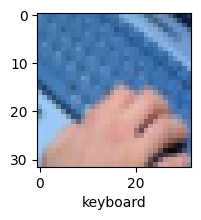

In [29]:
plot_sample(x_train,y_train,10)

## normalized your image

In [30]:
x_train=x_train/255.0
x_test=x_test/255.0

### Trying with CNN

In [31]:
from keras import Sequential
cnn = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3), strides=(2, 2), activation='relu', padding='same', input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),

    layers.Conv2D(kernel_size=(3, 3), padding='same', strides=(2, 2), filters=64),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(100,activation='sigmoid')
])

cnn.compile(optimizer='adam',
            loss= 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.0865 - loss: 4.0075
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 58ms/step - accuracy: 0.2584 - loss: 2.9726
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.3491 - loss: 2.5074
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 54ms/step - accuracy: 0.4244 - loss: 2.1552
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 55ms/step - accuracy: 0.5028 - loss: 1.8217
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5735 - loss: 1.5080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 57ms/step - accuracy: 0.6434 - loss: 1.2217
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 55ms/step - accuracy: 0.7082 - loss: 0.9795
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 56ms/step - accuracy: 0.7636 - loss: 0.7797
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.8027 - loss: 0.6470


In [32]:
y_pred_cnn_100 = cnn.predict(x_test)
y_pred_classes_cnn_100 =[np.argmax(element) for element in y_pred_cnn_100]
print("classification report with CNN:\n", classification_report(y_test,y_pred_classes_cnn_100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
classification report with CNN:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67       100
           1       0.56      0.48      0.52       100
           2       0.31      0.23      0.26       100
           3       0.22      0.24      0.23       100
           4       0.21      0.24      0.22       100
           5       0.30      0.41      0.35       100
           6       0.44      0.38      0.41       100
           7       0.45      0.43      0.44       100
           8       0.41      0.53      0.46       100
           9       0.49      0.44      0.46       100
          10       0.26      0.23      0.25       100
          11       0.19      0.18      0.19       100
          12       0.34      0.29      0.31       100
          13       0.31      0.43      0.36       100
          14       0.32      0.30      0.31       100
          15       0.21      0.27      0.24       100
      

### note: we only get 35% accuracy using CIFAR100 dataset. next you can try image augumentation: https://towardsdatascience.com/image-augmentation-14a0aafd0498#:~:text=Image%20augmentation%20is%20a%20technique,limited%20number%20of%20data%20samples.

# upload your jupyter notebook in dropbox "CIFAR 100 home work" and add note about model perfomance

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 定义数据增强的参数
datagen = ImageDataGenerator(
    rotation_range=15,            # 随机旋转角度范围 (0-15度)
    width_shift_range=0.1,        # 随机水平平移范围 (比例)
    height_shift_range=0.1,       # 随机垂直平移范围 (比例)
    horizontal_flip=True,         # 随机水平翻转
    zoom_range=0.1                # 随机缩放范围
)


In [ ]:
# 假设 x_train 已经归一化到 0-1 范围内
datagen.fit(x_train)
# 训练模型时使用增强数据生成器
cnn.fit(datagen.flow(x_train, y_train, batch_size=32),
        epochs=10,
        validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.3408 - loss: 2.7339 - val_accuracy: 0.3564 - val_loss: 2.6880
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3809 - loss: 2.4277 - val_accuracy: 0.3642 - val_loss: 2.6241
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.3933 - loss: 2.3485 - val_accuracy: 0.3818 - val_loss: 2.5633
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.4001 - loss: 2.3205 - val_accuracy: 0.3833 - val_loss: 2.5358
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4125 - loss: 2.2698 - val_accuracy: 0.3842 - val_loss: 2.5243
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4266 - loss: 2.2083 - val_accuracy: 0.3911 - val_loss: 2.4858
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4291 - loss: 2.1906 - val_accuracy: 0.4008 - val_loss: 2.4825
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4351 - lo

In [ ]:
history = cnn.fit(datagen.flow(x_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(x_test, y_test))

# 绘制训练和验证准确率
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 绘制训练和验证损失
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# 对测试集进行预测
y_pred = cnn.predict(x_test)
# 将预测的概率分布转换为类别标签
y_pred_classes = np.argmax(y_pred, axis=1)
# 如果 y_test 是二维数组，需要将其 reshape 成一维
y_test_1d = y_test.reshape(-1)

# 打印分类报告
print("Classification Report:\n", classification_report(y_test_1d, y_pred_classes))
